In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (20, 11.0)
pylab.rcParams['font.family'] = "serif"
pylab.rcParams['font.size'] = 16

In [3]:
import pandas as pd

In [4]:
def print_voltege(file, current_point=[0.1, 0.5, 1, 1.5, 2, 3, 4, 5]):
        
    with open(file) as file_description:
        lines = [line.rstrip() for line in file_description]
        
    s = ''
    for i in lines:
        s += i
    
    from xmltodict import parse
    doc = parse(s[3:])
    
    point_count = len(doc['RETOM-21']['TransCur']['Collection'])
    
    volt_point=[]
    I_old = 0
    V_old = 0
    line_interpol = lambda x, x1, x2, y1, y2: (y2-y1)*(x-x1)/(x2-x1) + y1
    
    for i in range(point_count):
        string_point = "Point_" + str(i)
        point = doc['RETOM-21']['TransCur']['Collection'][string_point]
        I = float(point['@Amper'])
        V = float(point['@Volt'])
        for current in current_point:
            if I_old < current and current < I:
                volt_result = line_interpol(current, I_old, I, V_old, V)
                volt_point.append(volt_result)
        I_old = I
        V_old = V

    for k in map(lambda x: round(x, 3), volt_point):
        print(k)

In [5]:
def read_r21_transI(xml_file):
    with open(xml_file) as file:
        lines = [line.rstrip() for line in file]
        
    s = ''
    for i in lines:
        s += i
    
    from xmltodict import parse
    doc = parse(s[3:])
    
    point_count = len(doc['RETOM-21']['TransCur']['Collection'])
    
    I = []
    V = []
    for i in range(point_count):
        string_point = "Point_" + str(i)
        point = doc['RETOM-21']['TransCur']['Collection'][string_point]
        I.append(float(point['@Amper']))
        V.append(float(point['@Volt']))

    return pd.DataFrame({"V": V, "I": I})

In [6]:
def print_voltage_in_current_point(data_frame, current_point=[0.1, 0.5, 1, 1.5, 2, 3, 4, 5]):
    df = pd.DataFrame(array(data_frame["V"]), index=array(data_frame["I"]))
    index = concatenate((df.index, current_point), axis=0)
    index.sort()
    df2 = df.reindex(index)
    df3 = df2.interpolate()
    
    for i in current_point:
        print(round(df3[0][i], 2))

In [7]:
def plotVA(pandasData, TT, color, subname=""):
    f, a = subplots(1, 1, sharey=False)

    #f.suptitle("Трансформатор тока: "+TT)
    a.plot(pandasData["I"], pandasData["V"], color+"-o", lw=2)

    a.set_xlim(-0.5, 5.5)
    a.set_ylim(0, 1.05*max(pandasData["V"]))
    a.set_xlabel("Ток, [A]", fontsize=16, family="serif")
    a.set_ylabel("Напряжение [В]", fontsize=16, family="serif")
    a.legend((TT, TT), loc="best")
    a.grid(which='minor', linewidth=0.3)
    a.grid(which='major', linewidth=1)

    f.savefig(TT+subname+".png", bbox_inches='tight', pad_inches=0.1)

111.66
131.47
138.94
140.34
140.75
142.16
142.75
143.21


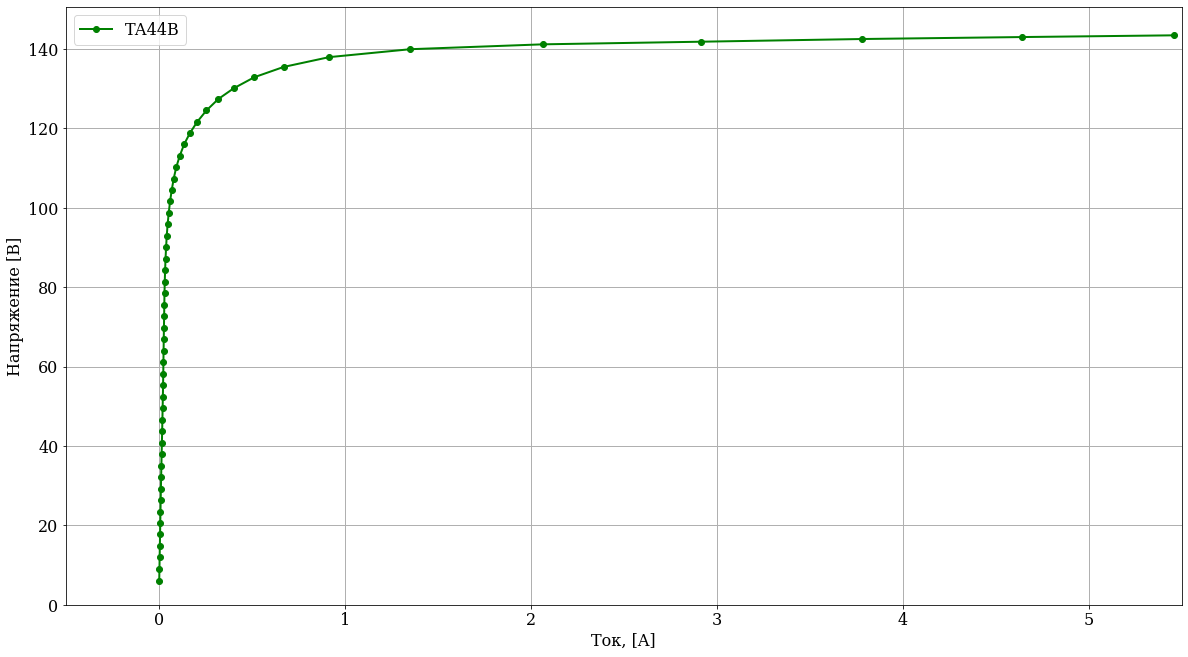

In [16]:
tt_name = "ТА44B"
trand_file = tt_name + ".r21_transI"
df = read_r21_transI(trand_file)
print_voltage_in_current_point(df)

plotVA(df, tt_name, color="g")